In [13]:
# libraries
import numpy as np
from facenet_pytorch import MTCNN
import cv2


mtcnn = MTCNN(image_size=160, margin=15, min_face_size=20,device='cpu', post_process=True)

# image_size:
# This parameter specifies the desired size of the input image after resizing.
# The MTCNN model will resize the input image to this size before processing.
# A common value is 160, which balances accuracy and computational efficiency.

# margin:
# The margin parameter controls the extra padding around the detected face bounding box.
# It ensures that the entire face (including some background) is included in the cropped face image.
# A larger margin provides more context around the face but may include non-face regions.

# post_process:
# When post_process is set to True, the MTCNN model performs additional post-processing steps.
# These steps include non-maximum suppression (NMS) to remove duplicate detections and refine the bounding boxes.
# If set to False, the raw bounding boxes without post-processing are returned.

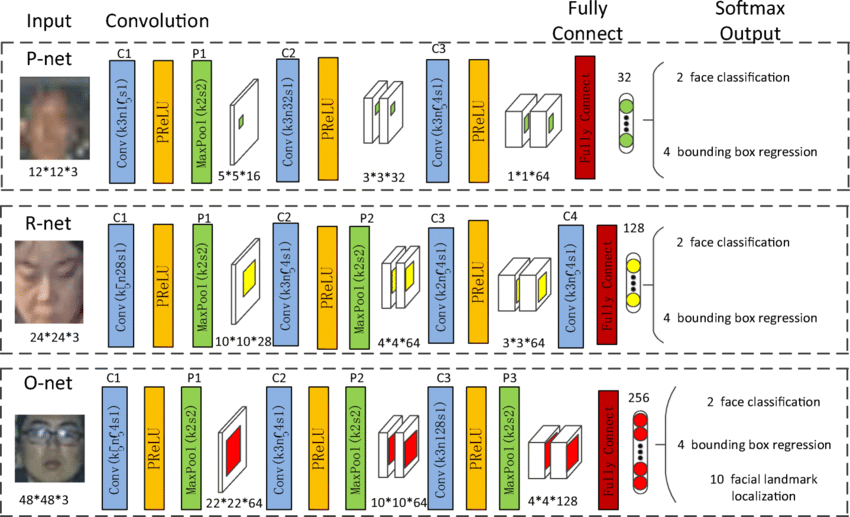
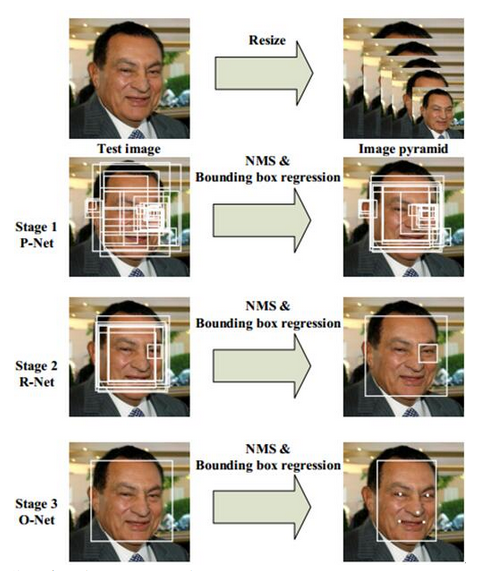

In [12]:
cap = cv2.VideoCapture('Hossam.mp4') #Test Project.avi 
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)

count = 0
while cap.isOpened() :

    ret, frame = cap.read()
    if not ret:
        break
    frame_BGR=frame.copy()
    
    frame=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    boxes, probs = mtcnn.detect(frame, landmarks=False)
    
    if  not probs.all() == None and probs.all() > 0.6 :
        for x1,y1,x2,y2 in boxes :
            x1,x2,y1,y2=int(x1),int(x2),int(y1),int(y2)
            ROI=frame_BGR[y1:y2,x1:x2]
            cv2.imwrite(f'faces/img{count}.jpg', ROI)
            count = count + 1
            cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 3)
            
    frame=cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)

    cv2.imshow("Project", frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'): # if press q
        break

cap.release()
cv2.destroyAllWindows()

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import glob as gb
from tqdm import tqdm
from tensorflow.keras.layers import ZeroPadding2D,\
Convolution2D, MaxPooling2D, Dropout, Flatten, Activation
from tensorflow.keras.models import Sequential ,load_model

In [67]:
trainpath = 'data/'
new_size=224    
X_train = []
y_train = []
for folder in  os.listdir(trainpath ) : 
    print( 'folder name is : ', folder)
    files = gb.glob(pathname= str( trainpath  + folder + '/*.jpg'))
    print( 'numbers of images in folder are : ', len(files))
    print(' start reading images')
    for file in files: 
        image_class = {'Hossam': 0,}
        orignal_image = cv2.imread(file)
        image = cv2.cvtColor(orignal_image, cv2.COLOR_BGR2RGB)
        resized_image = cv2.resize(image , (new_size,new_size))
        X_train.append(resized_image)
        y_train.append(image_class[folder])
    print('image reading ...finished')
print('--------------------------------------------------')        
#check items in X_test
print("items in X_train is:       ",len(X_train) , " items") 
print("items in y_train is:       ",len(y_train) , " items") 

folder name is :  Hossam
numbers of images in folder are :  2
 start reading images
image reading ...finished
--------------------------------------------------
items in X_train is:        2  items
items in y_train is:        2  items


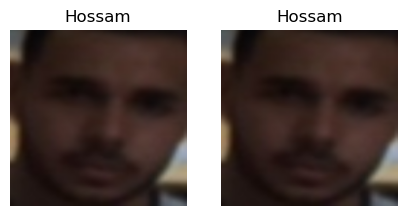

In [74]:
#showing training images with labels

plt.figure(figsize=(5,5))
for n , i in enumerate(list(np.random.randint(0,len(X_train ),2))) : 
    plt.subplot(1,2,n+1)
    plt.imshow(X_train[i])   
    classes = {'Hossam': 0}
    def ImageClass(n):
        for x , y in classes.items():
            if n == y :
                return x
    plt.title(ImageClass(y_train[i]))
    plt.axis('off')
plt.show()

In [75]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [76]:
#shuffle data
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)

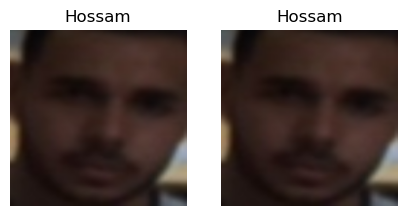

In [79]:
#showing training images with labels

plt.figure(figsize=(5,5))
for n , i in enumerate(list(np.random.randint(0,len(X_train ),2))) : 
    plt.subplot(1,2,n+1)
    plt.imshow(X_train[i])   
    classes = {'Hossam': 0}
    def ImageClass(n):
        for x , y in classes.items():
            if n == y :
                return x
    plt.title(ImageClass(y_train[i]))
    plt.axis('off')
plt.show()

In [80]:
#normalizing data
X_train=X_train/255.0

In [81]:
X_train[0]

array([[[0.29803922, 0.33333333, 0.32941176],
        [0.29803922, 0.33333333, 0.32941176],
        [0.29803922, 0.33333333, 0.3254902 ],
        ...,
        [0.0627451 , 0.04313725, 0.05882353],
        [0.0627451 , 0.04313725, 0.05882353],
        [0.0627451 , 0.04313725, 0.05882353]],

       [[0.29803922, 0.33333333, 0.32941176],
        [0.29803922, 0.33333333, 0.32941176],
        [0.29803922, 0.33333333, 0.32941176],
        ...,
        [0.0627451 , 0.04313725, 0.05882353],
        [0.0627451 , 0.04313725, 0.05882353],
        [0.0627451 , 0.04313725, 0.05882353]],

       [[0.30588235, 0.34117647, 0.3372549 ],
        [0.30588235, 0.34117647, 0.3372549 ],
        [0.30588235, 0.34117647, 0.33333333],
        ...,
        [0.07058824, 0.04705882, 0.0627451 ],
        [0.06666667, 0.04705882, 0.05882353],
        [0.06666667, 0.04705882, 0.05882353]],

       ...,

       [[0.10588235, 0.0745098 , 0.0627451 ],
        [0.10588235, 0.0745098 , 0.0627451 ],
        [0.10980392, 0

In [82]:
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, \
MaxPooling2D, Dropout, Flatten, Activation
from tensorflow.keras.models import Sequential ,load_model
from tensorflow.keras.models import Model
def vgg_face():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [83]:
model = vgg_face()
model.summary()

C:\Users\Nvidia\anaconda3\Lib\site-packages\keras\src\layers\reshaping\zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ zero_padding2d_39 (ZeroPadding2D)    │ (None, 226, 226, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_40 (ZeroPadding2D)    │ (None, 226, 226, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_41 (ZeroPadding2D)    │ (None, 114, 114, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_42 (ZeroPadding2D)    │ (None, 114, 114, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_43 (ZeroPadding2D)    │ (None, 58, 58, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_44 (ZeroPadding2D)    │ (None, 58, 58, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_45 (ZeroPadding2D)    │ (None, 58, 58, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_46 (ZeroPadding2D)    │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_47 (ZeroPadding2D)    │ (None, 30, 30, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 145,002,878 (553.14 MB)

 Trainable params: 145,002,878 (553.14 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
model = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)
model.load_weights('vgg_face_weights.h5')

In [85]:
embeddings = np.zeros((X_train.shape[0], 2622))
for i, m in enumerate(tqdm(X_train)):
    embedding_vector = model.predict(np.expand_dims(m, axis=0),verbose=0)[0]
    embeddings[i]=embedding_vector
    

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.06it/s]


In [86]:
embeddings.shape

(2, 2622)

In [87]:
y_train.shape

(2,)

In [88]:
y_train[:5]

array([0, 0])

In [89]:
# Reshape y_train to have one column
y_train_reshaped = y_train.astype(np.int32).reshape(-1, 1)
# Now concatenate embeddings and y_train_reshaped along axis 1 (columns)
w = np.concatenate((embeddings, y_train_reshaped), axis=1)

In [90]:
y_train_reshaped[:5]

array([[0],
       [0]])

In [91]:
w.shape

(2, 2623)

In [92]:
import pandas as pd
data=pd.DataFrame(w)

In [93]:
data.to_csv('recog22.csv',index=None)

In [94]:
data.shape

(2, 2623)

In [95]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,2613,2614,2615,2616,2617,2618,2619,2620,2621,2622
0,0.017689,0.007365,0.015663,0.006555,0.008043,0.007856,0.006848,0.006828,0.003917,0.012121,...,-0.007555,-0.018849,0.005683,0.00903,-0.002966,-0.013632,-0.007029,0.005087,0.014741,0.0
1,0.019679,0.007743,0.017038,0.002346,0.009980,0.009240,0.003311,0.011289,0.010602,0.010257,...,-0.004404,-0.020720,0.011053,0.00827,-0.001781,-0.013733,-0.011459,0.006037,0.017318,0.0


In [1]:
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation
from tensorflow.keras.models import Sequential ,load_model
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import cv2

In [2]:
def vgg_face():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [3]:
model = vgg_face()
model.summary()

C:\Users\Nvidia\anaconda3\Lib\site-packages\keras\src\layers\reshaping\zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ zero_padding2d (ZeroPadding2D)       │ (None, 226, 226, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_1 (ZeroPadding2D)     │ (None, 226, 226, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_2 (ZeroPadding2D)     │ (None, 114, 114, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_3 (ZeroPadding2D)     │ (None, 114, 114, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_4 (ZeroPadding2D)     │ (None, 58, 58, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_5 (ZeroPadding2D)     │ (None, 58, 58, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_6 (ZeroPadding2D)     │ (None, 58, 58, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_7 (ZeroPadding2D)     │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_8 (ZeroPadding2D)     │ (None, 30, 30, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 145,002,878 (553.14 MB)

 Trainable params: 145,002,878 (553.14 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)
model.load_weights('vgg_face_weights.h5')

In [5]:
def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

In [6]:
data=pd.read_csv('recog22.csv')

In [7]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,2613,2614,2615,2616,2617,2618,2619,2620,2621,2622
0,0.017689,0.007365,0.015663,0.006555,0.008043,0.007856,0.006848,0.006828,0.003917,0.012121,...,-0.007555,-0.018849,0.005683,0.00903,-0.002966,-0.013632,-0.007029,0.005087,0.014741,0.0
1,0.019679,0.007743,0.017038,0.002346,0.009980,0.009240,0.003311,0.011289,0.010602,0.010257,...,-0.004404,-0.020720,0.011053,0.00827,-0.001781,-0.013733,-0.011459,0.006037,0.017318,0.0


In [8]:
def MTCNN_to_Detections(faces,probs):
    detections = sv.Detections.empty()
    for face, prob in zip(faces, probs):
        # Create a bounding box array for each face
        bounding_box = np.array([int(face[0]),int(face[1]),int(face[2]),int(face[3])], dtype=np.float32)
        detections.xyxy = np.append(detections.xyxy, [bounding_box], axis=0)
        detections.confidence = np.append(detections.confidence, prob)
        detections.class_id = np.append(detections.class_id, 0)
    return detections
    
def pre_Processing(roi,model):
    img = roi / 255.0
    img = cv2.resize(img, dsize = (224,224))
    embedding_vector = model.predict(np.expand_dims(img, axis=0))[0]
    return embedding_vector
    
def face_recognition(data,embedding_vector):
    classifier=['Hossam']
    for i in range(data.shape[0]):
        sim=findCosineSimilarity(embedding_vector,data.iloc[i,:-1])
        print(sim)
        if sim < 0.3 :
            name = classifier[int(data.iloc[i,-1])]
            break
    else :   
        name = 'not_Know'
    return name 
        
def TrackID_With_Recognition(tracker,detections,student_id,model,data):
    detections = tracker.update_with_detections(detections)
    for tracker_id,box in zip(detections.tracker_id,detections.xyxy) :
        if tracker_id not in student_id :
            x1,y1,x2,y2 = int(box[0]),int(box[1]),int(box[2]),int(box[3])
            roi=frame[y1:y2,x1:x2]
            embedding_vector = pre_Processing(roi,model)
            student_id[tracker_id]=face_recognition(data,embedding_vector)
    return student_id,detections

def drow_detection(frame,detections):
    # Convert back to BGR format for display
    for box , _,_ , _,track_id ,_ in detections :
        x1,y1,x2,y2 = int(box[0]),int(box[1]),int(box[2]),int(box[3])
        cv2.rectangle(frame,(x1,y1),(x2,y2),(255,0,0),2)
        cv2.putText(frame, f'ID {track_id}',(x2,y2), cv2.FONT_HERSHEY_SIMPLEX,1,(255, 0, 0), 2, cv2.LINE_AA)
        cv2.putText(frame, f'{student_id[track_id]}',(x1,y1-8), cv2.FONT_HERSHEY_SIMPLEX,1,(255, 0, 0), 2, cv2.LINE_AA)
    return frame

In [10]:
# Suppress potential OpenMP warnings (optional)
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

import numpy as np
import matplotlib.pyplot as plt  # Optional for visualization
import cv2
from facenet_pytorch import MTCNN
import torch
import supervision as sv

# Create a ByteTrack tracker to keep track of detections
tracker = sv.ByteTrack()

# Decide if using GPU or CPU for computations
if torch.cuda.is_available():
    device = "cuda:0"
else:
    device = "cpu"

device = torch.device(device)

# Initialize MTCNN for face detection with specific parameters
mtcnn = MTCNN(image_size=160, margin=14, min_face_size=20, post_process=False)

cap=cv2.VideoCapture(0)   #  'Hossam.mp4'

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH) )
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
size = (width, height)
result_video = cv2.VideoWriter('filename6.avi', 
                         cv2.VideoWriter_fourcc(*'MJPG'),
                         10, size)

student_id={}

while True:
    # Read a frame from the video capture
    ret, frame = cap.read()
    if not ret:
        break
    # Convert frame to RGB format (MTCNN expects RGB)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    detections = sv.Detections.empty()
    # Detect faces using MTCNN
    faces, probs = mtcnn.detect(frame, landmarks=False)
    
    if  not probs.all() == None and probs.all()>0.95 :
        # Process detected faces
        detections = MTCNN_to_Detections(faces,probs)
        # Update tracker 
        student_id,detections = TrackID_With_Recognition(tracker,detections,student_id,model,data)

    frame = drow_detection(frame,detections)
    
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    # Display the frame with annotations (optional)
    cv2.imshow('frame', frame)
    result_video.write(frame)
    # Exit if 'q' key is pressed
    if cv2.waitKey(1) == ord('q'):
        break

# Release resources
cap.release()
result_video.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
0.24264403321375438
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
0.5632367310915682
0.5127675734353991
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
0.2942029540890593
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
0.26210155259626444
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
0.4945719129570667
0.44318339598341516
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
0.2642479216447522


In [105]:
student_id

{57: 'Hossam'}